<a href="https://colab.research.google.com/github/ffelfis/OrgaDatosTPs/blob/main/TP1/Diego_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBRERIAS

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import cv2
import requests
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
train_values = pd.read_csv("./drive/My Drive/Colab Notebooks/TP1/train_values.csv")
train_labels = pd.read_csv("./drive/My Drive/Colab Notebooks/TP1/train_labels.csv")

In [4]:
train_labels.dtypes

building_id     int64
damage_grade    int64
dtype: object

In [5]:
train_values.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

# 0 - Daño Global

In [ ]:
ag = {'Cantidad' : ('building_id','count'),}
cantidad_x_magnitud = train_labels.groupby(['damage_grade']).agg(**ag).reset_index()
#cantidad_x_magnitud = cantidad_x_magnitud.sort_values('Cantidad')
cantidad_x_magnitud

,damage_grade,Cantidad
0,1,25124
1,2,148259
2,3,87218


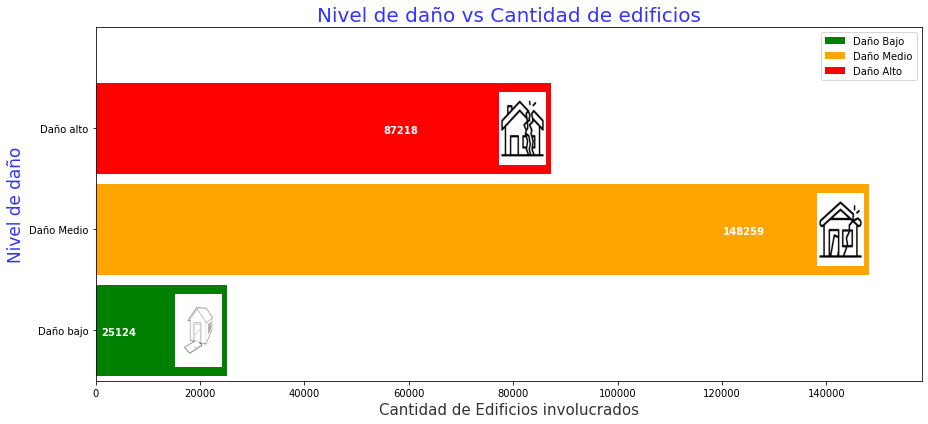

In [ ]:
labels =['Daño bajo','Daño Medio','Daño alto']
colors = ['green','orange','red']
levels = ['Daño Bajo','Daño Medio','Daño Alto']
values = cantidad_x_magnitud['Cantidad']

height = 0.9
v =plt.barh(y=labels, width=values, height=height, color=colors, align='center')
plt.title("Nivel de daño vs Cantidad de edificios", fontsize=20, color = 'blue',alpha = 0.8)
plt.ylabel("Nivel de daño", fontsize=17, color = 'blue', alpha = 0.8)
plt.xlabel("Cantidad de Edificios involucrados", fontsize=15, color = 'black', alpha = 0.8)

for i, (label, value) in enumerate(zip(labels, values)):
    rut = (f'./drive/My Drive/Colab Notebooks/TP1/imagenes/damage{i+1}.jpg')
    img = cv2.imread(rut, cv2.IMREAD_COLOR)
    plt.imshow(img, extent=[value - 10000, value - 1000, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2, filterrad=10.0)

plt.xlim(0, max(values)+10000)
plt.ylim(-0.5, 3)
plt.legend(v, levels)

for i, v in enumerate(values):
    izq = 20000 + (i+1)*4000
    plt.text(v - izq,i - .05, str(v), color='white', fontweight='bold')

plt.gcf().set_size_inches(13, 6)
plt.tight_layout()
plt.show()

# 1 - Analisis de Antiguedad de Edificios

In [ ]:
#MERGE
values_labels = train_values.merge(train_labels, how = 'inner' , on='building_id')
#print(values_labels.head(1))

ag = {'Cantidad' : ('building_id','count'),}
group_height = train_values.groupby(['height_percentage']).agg(**ag).reset_index()
altura_normalizada_max = group_height['height_percentage'].max()
altura_normalizada_min = group_height['height_percentage'].min()
#print(group_height.head())

ag = {'Cantidad' : ('building_id','count'),}
group_area = train_values.groupby(['area_percentage']).agg(**ag).reset_index()
area_normalizada_max = group_area['area_percentage'].max()
area_normalizada_min = group_area['area_percentage'].min()
#print(group_area.head())

area_high_damage = values_labels.loc[:,['area_percentage','height_percentage','damage_grade','age']]
area_high_damage['g1'] = (area_high_damage['damage_grade'] == 1).astype(int)
area_high_damage['g2'] = (area_high_damage['damage_grade'] == 2).astype(int)
area_high_damage['g3'] = (area_high_damage['damage_grade'] == 3).astype(int)
#print(area_high_damage.head(1))

ag = {'Cantidad_g1' : ('g1','sum'),
        'Cantidad_g2' : ('g2','sum'),
        'Cantidad_g3' : ('g3','sum'),
      }
result = area_high_damage.groupby(['age']).agg(**ag).reset_index()
#print(result.head(10))

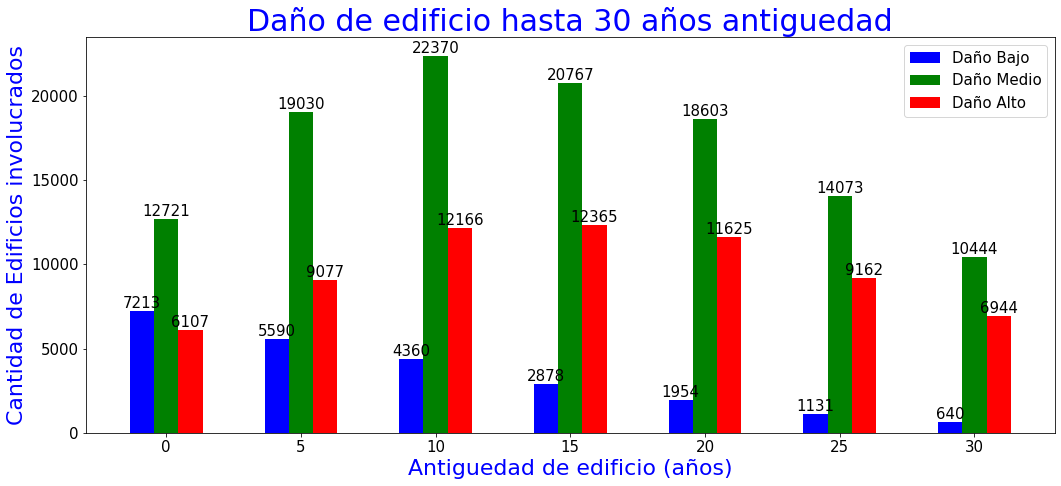

In [ ]:
result_30 = result[(result['age'] <= 30)]

labels = result_30['age']

daño_min = result_30['Cantidad_g1']
daño_medio = result_30['Cantidad_g2']  
daño_max = result_30['Cantidad_g3']

plt.rcParams.update({'font.size': 15})

fig, ax = plt.subplots()
ax.set_ylabel('Cantidad de Edificios involucrados', fontsize=22, color='blue')
ax.set_xlabel('Antiguedad de edificio (años)', fontsize=22, color='blue')

w = 0.9
bar1 = ax.bar(labels - w, daño_min, width=w, color='b', align='center', label = 'Daño Bajo')
bar2 = ax.bar(labels, daño_medio, width=w, color='g', align='center',label = 'Daño Medio')
bar3 = ax.bar(labels + w, daño_max, width=w, color='r', align='center', label = 'Daño Alto')

ax.set_title('Daño de edificio hasta 30 años antiguedad',fontsize=30, color='blue')
#ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.00*h, '%d'%int(h),
                ha='center', va='bottom')
        
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.gcf().set_size_inches(15, 7)
fig.tight_layout()
plt.show()

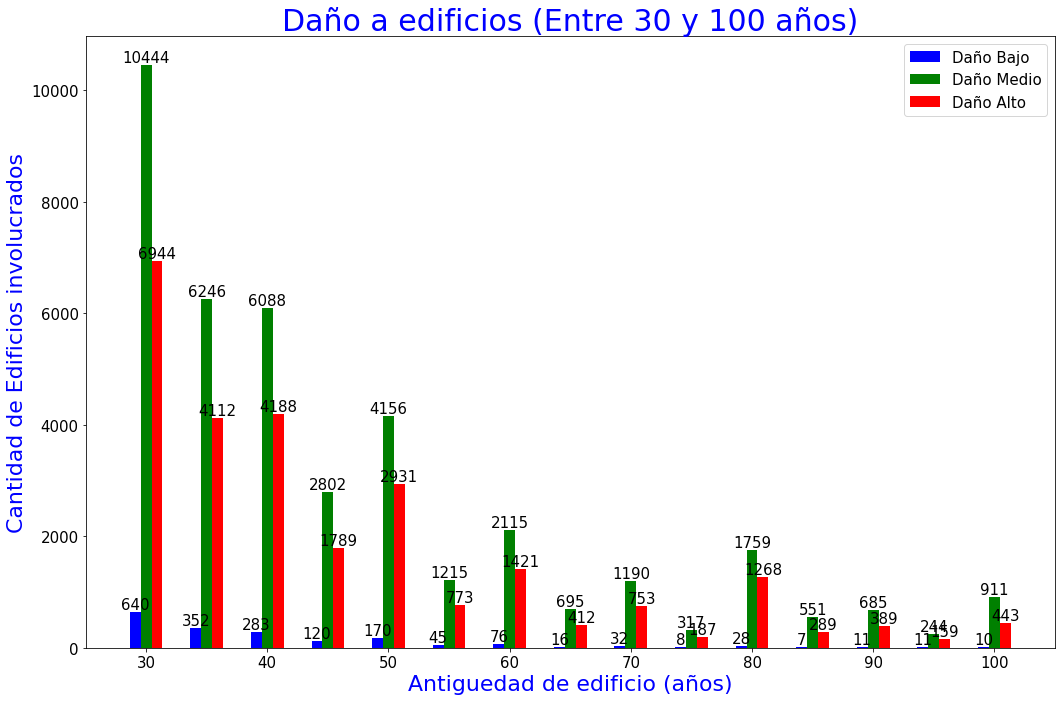

In [ ]:
result_mas_30 = result[(result['age'] >= 30) & (result['age'] <= 100) ]

labels = result_mas_30['age']

daño_min = result_mas_30['Cantidad_g1']
daño_medio = result_mas_30['Cantidad_g2']  
daño_max = result_mas_30['Cantidad_g3']

plt.rcParams.update({'font.size': 15})

fig, ax = plt.subplots()
ax.set_ylabel('Cantidad de Edificios involucrados', fontsize=22, color='blue')
ax.set_xlabel('Antiguedad de edificio (años)', fontsize=22, color='blue')

w = 0.9
bar1 = ax.bar(labels - w, daño_min, width=w, color='b', align='center', label = 'Daño Bajo')
bar2 = ax.bar(labels, daño_medio, width=w, color='g', align='center',label = 'Daño Medio')
bar3 = ax.bar(labels + w, daño_max, width=w, color='r', align='center', label = 'Daño Alto')

ax.set_title('Daño a edificios (Entre 30 y 100 años)',fontsize=30, color='blue')
#ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.00*h, '%d'%int(h),
                ha='center', va='bottom')
        
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.gcf().set_size_inches(15, 10)
fig.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

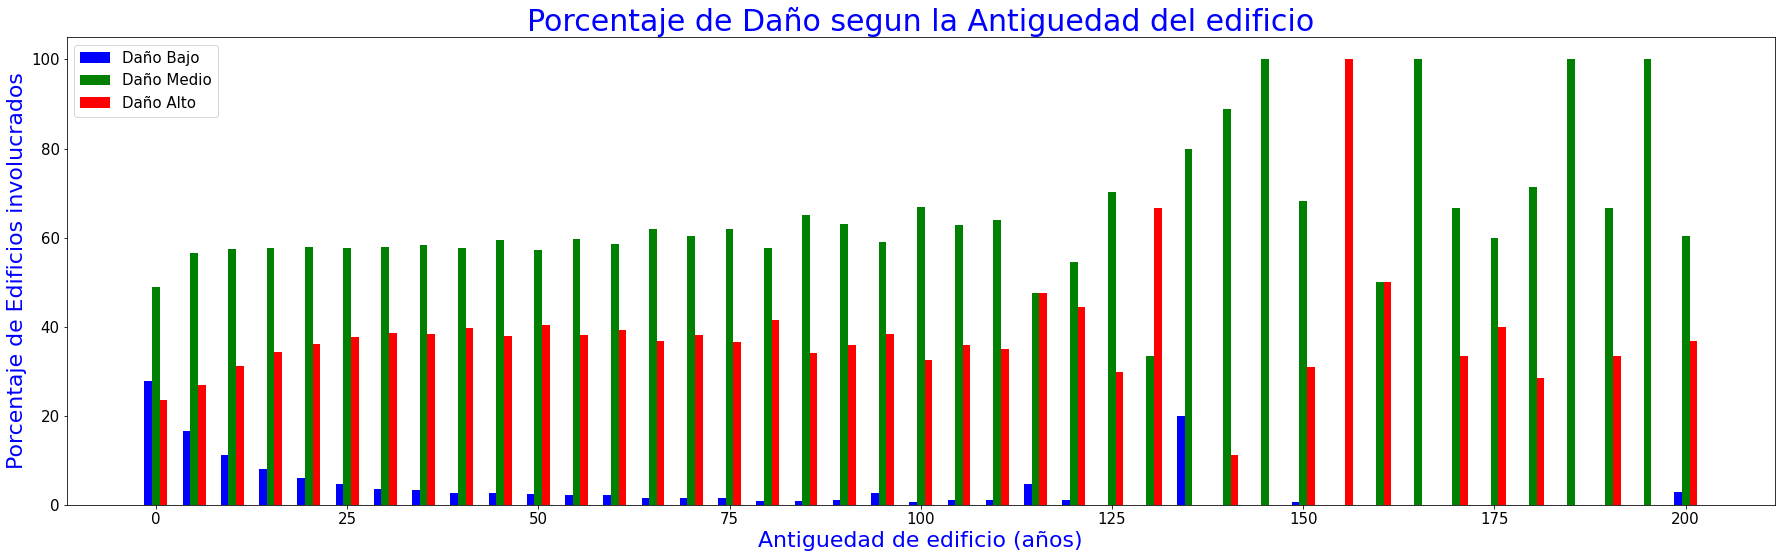

In [ ]:

prom = result[(result['age'] <= 200)]
prom['total'] = prom['Cantidad_g1'] + prom['Cantidad_g2'] + prom['Cantidad_g3'] 
prom['p1'] = prom['Cantidad_g1'] * 100 / prom['total'] 
prom['p2'] = prom['Cantidad_g2'] * 100 / prom['total'] 
prom['p3'] = prom['Cantidad_g3'] * 100 / prom['total'] 

labels = prom['age']

daño_min = prom['p1']
daño_medio = prom['p2']  
daño_max = prom['p3']

plt.rcParams.update({'font.size': 15})

fig, ax = plt.subplots()
ax.set_ylabel('Porcentaje de Edificios involucrados', fontsize=22, color='blue')
ax.set_xlabel('Antiguedad de edificio (años)', fontsize=22, color='blue')

w = 1
bar1 = ax.bar(labels - w, daño_min, width=w, color='b', align='center', label = 'Daño Bajo')
bar2 = ax.bar(labels, daño_medio, width=w, color='g', align='center',label = 'Daño Medio')
bar3 = ax.bar(labels + w, daño_max, width=w, color='r', align='center', label = 'Daño Alto')

ax.set_title('Porcentaje de Daño segun la Antiguedad del edificio',fontsize=30, color='blue')
#ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    anterior = 0
    for rect in rects:
      h = rect.get_height()
      if(h):
        #print(str(round(h,1)) + '!=?' + str(round(anterior,1)))
        ax.text(rect.get_x()+rect.get_width()/2., 1.00*h, '%d'%int(h) + '%',ha='center', va='bottom')
      anterior = h
        
#autolabel(bar1)
#autolabel(bar2)
#autolabel(bar3)

plt.gcf().set_size_inches(25, 8)
fig.tight_layout()
plt.show()

**Conclusión**
Pueden observarse claramente comom a medida que los años de aniguedad se incrementan los daños minimos pasan a ascender al nivel de daños medio y altos. 
Los edificios que aaún siquiera cumplen años reciben un porcentaje de daño bajo superior al daño grave. 

El daño medio se mantiene sin importar los años, con excepciones en antiguedades como por ejemplo 130 o 155 años, donde los daños graves son absolutos o comparten el mismo porcentaje. 

También en general puede observarse que los daños bajos a partir de los 25 años disminuyen o son nulos con una exepción en los 135 años de antiguedad. 

Estas variaciones o excepciones pueden ser analizadas más en profundidad puntualizando en el tipo de materiales o pisos que concentran ese grupo de datos.

**Años de antiguedad importantes a analizar :** 

Daños bajos y medios : 135

Daños unicamente medios : 145,165,185,195

Daños unicamente graves o 50%: 130,155,160

**Importante a separar en :**

Edificios entre 100 y 200, 200 y 500, 500 o más.


**Cuestiones:**
Analizar que materiales poseen.
Analizar cuantos pisos.
Districion por periodos y edad.


# Relación de daños con materiales

In [6]:
#MERGE
values_labels = train_values.merge(train_labels, how = 'inner' , on='building_id')

#FILTRO COLUMNAS
col = list(values_labels.columns)
filtro1 = [col for col in values_labels if col.find('has_superstructure')>=0]
filtro1.append('age')
materiales = values_labels.loc[:,filtro1]
traducciones = ['adobe_barro','barro_piedra','piedra','cemento_piedra','barro_ladrillos','cemento_ladrillos','madera','caña','concreto_reforzado','concreto_reforzado_diseñado','otros','antiguedad']

def renombrar_columnas(df):
    i = 0
    for nombre in filtro1:
        newname = traducciones[i]
        i = i+1 
        df = df.rename(columns={nombre : newname}) #nombre[19:len(s)]
    return df

#RENOMBRO COLUMNAS
materiales = renombrar_columnas(materiales)
materiales.drop('otros', axis='columns', inplace=True)
ag = {'Cantidad_g1' : ('g1','sum'),
        'Cantidad_g2' : ('g2','sum'),
        'Cantidad_g3' : ('g3','sum'),
      }

#FILTRO POR LAS FECHAS DESTACADAS
materiales_30 = materiales[(materiales['antiguedad'] >= 130) & (materiales['antiguedad'] <= 135)]
result = materiales_30.groupby(['antiguedad']).agg('sum').reset_index()

#QUITO MATERIALES INEXISTENTES CON ESAS ANTIGUEDADES
result.drop(['piedra','cemento_piedra','caña','concreto_reforzado_diseñado'],axis = 'columns',inplace=True) 
result['total'] = result.iloc[:,1:7].sum(axis=1)
result['adobe_barro'] = result['adobe_barro'] * 100 / result['total'] 
result['barro_piedra'] = result['barro_piedra'] * 100 / result['total'] 
result['barro_ladrillos'] = result['barro_ladrillos'] * 100 / result['total'] 
result['cemento_ladrillos'] = result['cemento_ladrillos'] * 100 / result['total'] 
result['madera'] = result['madera'] * 100 / result['total'] 
result['concreto_reforzado'] = result['concreto_reforzado'] * 100 / result['total'] 
#result.drop(['antiguedad','total'],axis = 'columns',inplace=True) 
result

,antiguedad,adobe_barro,barro_piedra,barro_ladrillos,cemento_ladrillos,madera,concreto_reforzado,total
0,130,9.090909,72.727273,9.090909,0.0,9.090909,0.0,11
1,135,25.000000,25.000000,25.000000,12.5,0.000000,12.5,8


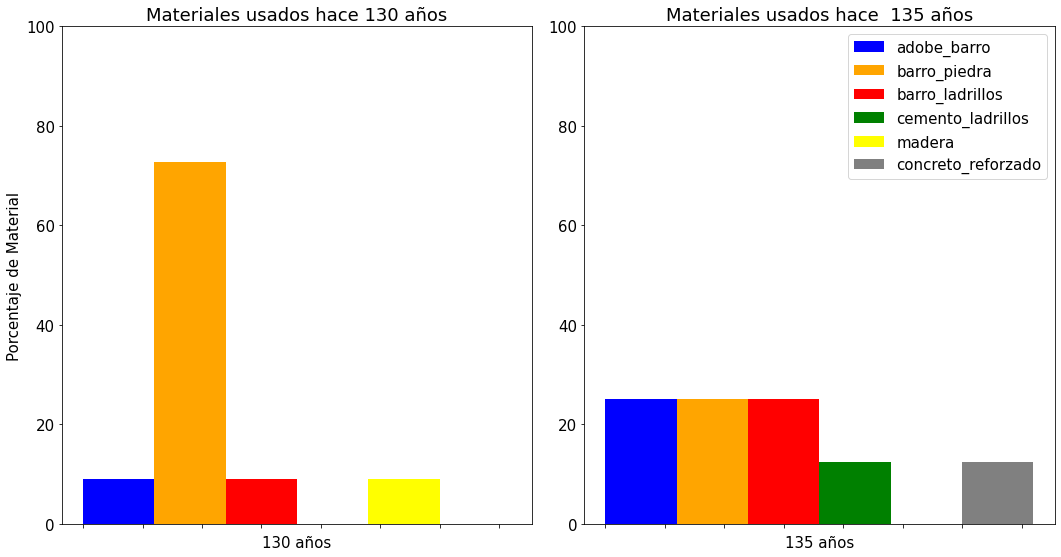

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import cv2

#FILTROS DE AÑOS
result_130 = result[result['antiguedad']==130]
result_135 = result[result['antiguedad']==135]


#CONFIG VISUALIZACION
plt.rcParams.update({'font.size': 15})
fig, (ax1, ax2) = plt.subplots(1, 2)
ax.set_ylabel('Cantidad de Edificios involucrados', fontsize=22, color='blue')
ax.set_xlabel('Antiguedad de edificio (años)', fontsize=22, color='blue')
w = 0.3


#ANTIGUEDAD 130
labels = result_130['antiguedad']
adobe_barro = result_130['adobe_barro']
barro_piedra = result_130['barro_piedra']  
barro_ladrillos = result_130['barro_ladrillos']
cemento_ladrillos = result_130['cemento_ladrillos']
madera	 = result_130['madera']  
concreto_reforzado = result_130['concreto_reforzado']

bar1 = ax1.bar(labels - (w*2), adobe_barro, width=w, color='blue', align='center', label = 'adobe_barro')
bar2 = ax1.bar(labels -w, barro_piedra, width=w, color='orange', align='center',label = 'barro_piedra')
bar3 = ax1.bar(labels, barro_ladrillos, width=w, color='red', align='center', label = 'barro_ladrillos')
bar4 = ax1.bar(labels + w, cemento_ladrillos, width=w, color='green', align='center', label = 'cemento_ladrillos')
bar5 = ax1.bar(labels + (w*2), madera, width=w, color='yellow', align='center',label = 'madera')
bar6 = ax1.bar(labels + (w*3), concreto_reforzado, width=w, color='grey', align='center', label = 'concreto_reforzado')


#ANTIGUEDAD 135
labels = result_135['antiguedad']
adobe_barro = result_135['adobe_barro']
barro_piedra = result_135['barro_piedra']  
barro_ladrillos = result_135['barro_ladrillos']
cemento_ladrillos = result_135['cemento_ladrillos']
madera	 = result_135['madera']  
concreto_reforzado = result_135['concreto_reforzado']

bar1 = ax2.bar(labels - (w*2), adobe_barro, width=w, color='blue', align='center', label = 'adobe_barro')
bar2 = ax2.bar(labels -w, barro_piedra, width=w, color='orange', align='center',label = 'barro_piedra')
bar3 = ax2.bar(labels, barro_ladrillos, width=w, color='red', align='center', label = 'barro_ladrillos')
bar4 = ax2.bar(labels + w, cemento_ladrillos, width=w, color='green', align='center', label = 'cemento_ladrillos')
bar5 = ax2.bar(labels + (w*2), madera, width=w, color='yellow', align='center',label = 'madera')
bar6 = ax2.bar(labels + (w*3), concreto_reforzado, width=w, color='grey', align='center', label = 'concreto_reforzado')


#ax1.set_title('Daño de edificio hasta 30 años antiguedad',fontsize=30, color='blue')
#ax.set_xticklabels(labels)

ax2.legend()
ax1.axes.xaxis.set_ticklabels([])
ax2.axes.xaxis.set_ticklabels([])

rut = (f'./drive/My Drive/Colab Notebooks/TP1/imagenes/damage3.jpg')
#img = cv2.imread(rut, cv2.IMREAD_COLOR)
#ax1.imshow(rut)
    
data=[adobe_barro,barro_piedra,barro_piedra,barro_ladrillos,cemento_ladrillos,madera,concreto_reforzado]
images=[rut,rut,rut,rut,rut,rut,rut]
#image_plot(data, flags, spacing=2)
  
#plt.xlim(130, max(labels))
#plt.xticks(2,2)
#plt.rcParams['axes.facecolor']='white'
#plt.rcParams['savefig.facecolor']='white'
#ax = plt.gca()

ax1.set_facecolor((1, 1, 1))
ax2.set_facecolor((1, 1, 1))
ax1.set_ylim([0, 100])
ax2.set_ylim([0, 100])
ax1.set_title('Materiales usados hace 130 años')
ax2.set_title('Materiales usados hace  135 años')

ax1.set(xlabel='130 años', ylabel='Porcentaje de Material')
ax2.set(xlabel='135 años')

plt.gcf().set_size_inches(15, 8)
fig.tight_layout()
plt.show()

In [ ]:
result_130 = result[result['antiguedad']==130]
result_130.drop(['antiguedad','total'],axis = 'columns',inplace=True) 
result_130 = result_130.transpose().reset_index()
result_130.rename(index=str, columns={0: "New name"})
result_130 = result_130.rename(index=str, columns={0: "Porcentaje", 'index':'Material'})
result_130

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Material,Porcentaje
0,adobe_barro,9.090909
1,barro_piedra,72.727273
2,barro_ladrillos,9.090909
3,cemento_ladrillos,0.000000
4,madera,9.090909
5,concreto_reforzado,0.000000


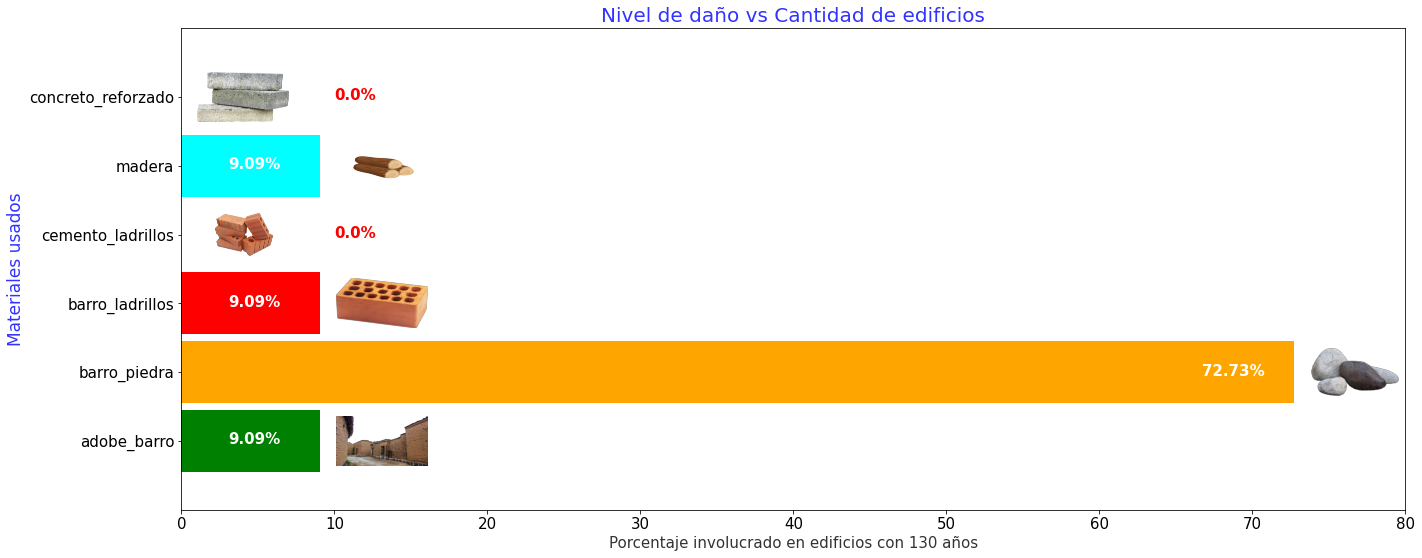

In [ ]:
labels = result_130['Material'].tolist()
colors = ['green','orange','red','grey','cyan','blue']
levels = ['Daño Bajo','Daño Medio','Daño Alto']
values = result_130['Porcentaje'].tolist()

height = 0.9
v =plt.barh(y=labels, width=values, height=height, color=colors, align='center')
plt.title("Nivel de daño vs Cantidad de edificios", fontsize=20, color = 'blue',alpha = 0.8)
plt.ylabel("Materiales usados", fontsize=17, color = 'blue', alpha = 0.8)
plt.xlabel("Porcentaje involucrado en edificios con 130 años", fontsize=15, color = 'black', alpha = 0.8)

tip = ['adobe_barro','barro_piedra','barro_ladrillos','cemento_ladrillos','madera','concreto_reforzado']
for i, (label, value) in enumerate(zip(labels, values)):
   rut = (f'./drive/My Drive/Colab Notebooks/TP1/imagenes/materiales/iconos/{tip[i]}.png')
   img = mpimg.imread(rut)
   plt.imshow(img, extent=[value + 1, value +7, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2, filterrad=10.0)


plt.xlim(0, 80)
plt.ylim(-1, 6)

for i, v in enumerate(values):
    izq = 10 + (i+1)*1
    if v == 0.0 :
      position = v + 10
      colors = 'red'
    else : 
      position = v - 6
      colors = 'white'
    plt.text(position,i - .05, str(round(v, 2)) + '%', color=colors, fontweight='bold')

plt.gcf().set_size_inches(20, 8)
plt.tight_layout()
plt.show()

In [ ]:
result_135 = result[result['antiguedad']==135]
result_135.drop(['antiguedad','total'],axis = 'columns',inplace=True) 
result_135 = result_135.transpose().reset_index()
result_135.rename(index=str, columns={0: "New name"})
result_135 = result_135.rename(index=str, columns={1: "Porcentaje", 'index':'Material'})
result_135

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Material,Porcentaje
0,adobe_barro,25.0
1,barro_piedra,25.0
2,barro_ladrillos,25.0
3,cemento_ladrillos,12.5
4,madera,0.0
5,concreto_reforzado,12.5


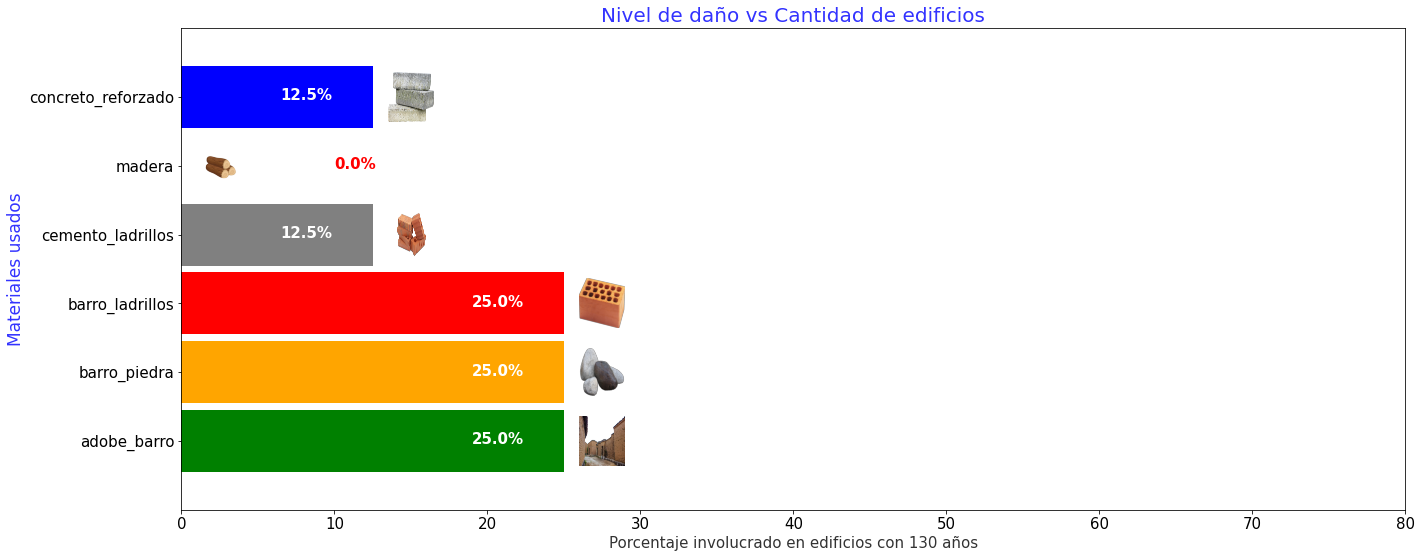

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import cv2
import requests
import matplotlib.image as mpimg

labels = result_135['Material'].tolist()
colors = ['green','orange','red','grey','cyan','blue']
levels = ['Daño Bajo','Daño Medio','Daño Alto']
values = result_135['Porcentaje'].tolist()

height = 0.9
v =plt.barh(y=labels, width=values, height=height, color=colors, align='center')
plt.title("Nivel de daño vs Cantidad de edificios", fontsize=20, color = 'blue',alpha = 0.8)
plt.ylabel("Materiales usados", fontsize=17, color = 'blue', alpha = 0.8)
plt.xlabel("Porcentaje involucrado en edificios con 130 años", fontsize=15, color = 'black', alpha = 0.8)

tip = ['adobe_barro','barro_piedra','barro_ladrillos','cemento_ladrillos','madera','concreto_reforzado']
for i, (label, value) in enumerate(zip(labels, values)):
   rut = (f'./drive/My Drive/Colab Notebooks/TP1/imagenes/materiales/iconos/{tip[i]}.png')
   img = mpimg.imread(rut)
   plt.imshow(img, extent=[value + 1, value +4, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2, filterrad=10.0)


plt.xlim(0, 80)
plt.ylim(-1, 6)
#plt.legend(v, labels)

for i, v in enumerate(values):
    izq = 10 + (i+1)*1
    if v == 0.0 :
      position = v + 10
      colors = 'red'
    else : 
      position = v - 6
      colors = 'white'
    plt.text(position,i - .05, str(round(v, 2)) + '%', color=colors, fontweight='bold')

plt.gcf().set_size_inches(20, 8)
plt.tight_layout()
plt.show()

In [15]:
#FILTRO POR LAS FECHAS DESTACADAS
materiales_55 = materiales[(materiales['antiguedad'] == 155)]
result = materiales_55.groupby(['antiguedad']).agg('sum').reset_index()

#QUITO MATERIALES INEXISTENTES CON ESAS ANTIGUEDADES
result.drop(['piedra','cemento_piedra','caña','concreto_reforzado_diseñado'],axis = 'columns',inplace=True) 
result['total'] = result.iloc[:,1:7].sum(axis=1)
result['adobe_barro'] = result['adobe_barro'] * 100 / result['total'] 
result['barro_piedra'] = result['barro_piedra'] * 100 / result['total'] 
result['barro_ladrillos'] = result['barro_ladrillos'] * 100 / result['total'] 
result['cemento_ladrillos'] = result['cemento_ladrillos'] * 100 / result['total'] 
result['madera'] = result['madera'] * 100 / result['total'] 
result['concreto_reforzado'] = result['concreto_reforzado'] * 100 / result['total'] 
#result.drop(['antiguedad','total'],axis = 'columns',inplace=True) 
result



,antiguedad,adobe_barro,barro_piedra,barro_ladrillos,cemento_ladrillos,madera,concreto_reforzado,total
0,155,100.0,0.0,0.0,0.0,0.0,0.0,1


In [16]:
result_155 = result
result_155.drop(['antiguedad','total'],axis = 'columns',inplace=True) 
result_155 = result_155.transpose().reset_index()
#result_155.rename(index=str, columns={0: "New name"})
result_155 = result_155.rename(index=str, columns={0: "Porcentaje", 'index':'Material'})
result_155

,Material,Porcentaje
0,adobe_barro,100.0
1,barro_piedra,0.0
2,barro_ladrillos,0.0
3,cemento_ladrillos,0.0
4,madera,0.0
5,concreto_reforzado,0.0


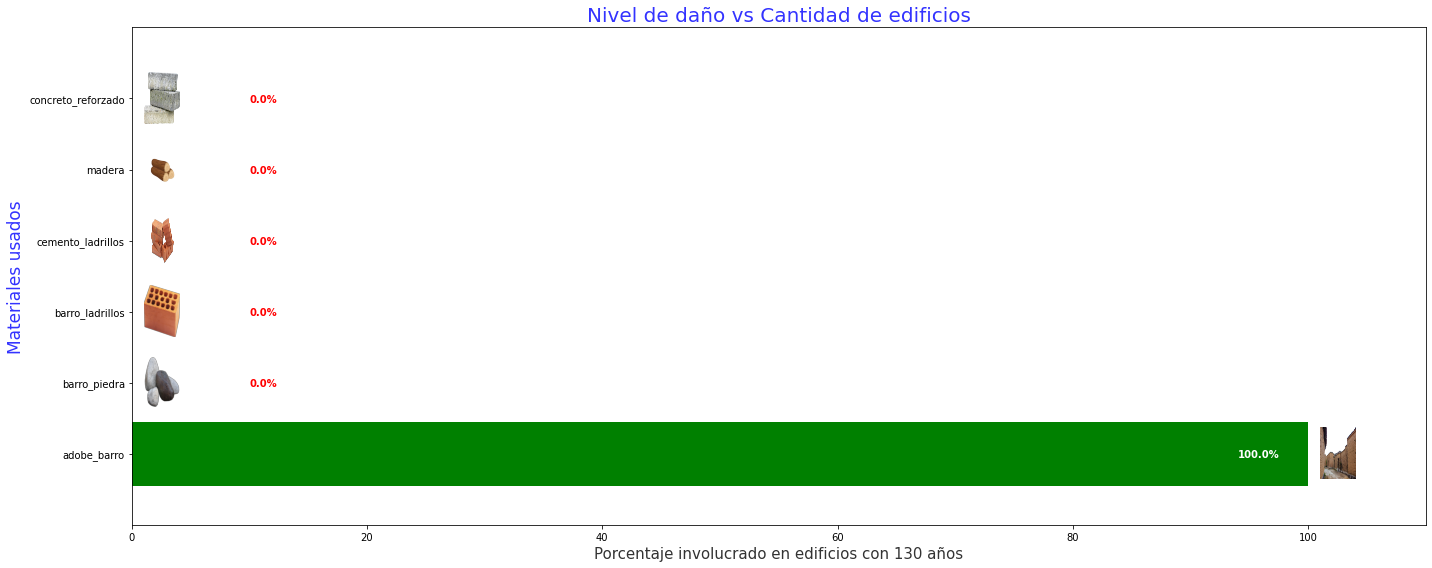

In [21]:
labels = result_155['Material'].tolist()
colors = ['green','orange','red','grey','cyan','blue']
levels = ['Daño Bajo','Daño Medio','Daño Alto']
values = result_155['Porcentaje'].tolist()

height = 0.9
v =plt.barh(y=labels, width=values, height=height, color=colors, align='center')
plt.title("Nivel de daño vs Cantidad de edificios", fontsize=20, color = 'blue',alpha = 0.8)
plt.ylabel("Materiales usados", fontsize=17, color = 'blue', alpha = 0.8)
plt.xlabel("Porcentaje involucrado en edificios con 130 años", fontsize=15, color = 'black', alpha = 0.8)

tip = ['adobe_barro','barro_piedra','barro_ladrillos','cemento_ladrillos','madera','concreto_reforzado']
for i, (label, value) in enumerate(zip(labels, values)):
   rut = (f'./drive/My Drive/Colab Notebooks/TP1/imagenes/materiales/iconos/{tip[i]}.png')
   img = mpimg.imread(rut)
   plt.imshow(img, extent=[value + 1, value +4, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2, filterrad=10.0)


plt.xlim(0, 110)
plt.ylim(-1, 6)
#plt.legend(v, labels)

for i, v in enumerate(values):
    izq = 10 + (i+1)*1
    if v == 0.0 :
      position = v + 10
      colors = 'red'
    else : 
      position = v - 6
      colors = 'white'
    plt.text(position,i - .05, str(round(v, 2)) + '%', color=colors, fontweight='bold')

plt.gcf().set_size_inches(20, 8)
plt.tight_layout()
plt.show()

**Año 130: Daños Graves y Medios**
Materiales utilizados principalmente piedras y barro y algunas estructuras de madera

**Año 135: Daños Medios y bajos**
Se equilibra la utilizacion de piedras y barro y se incrementa la utilizacion de ladrillos y concreto. No se presentan estructuras con madera

**Año 155: Daños graves**
Sin embargo tenemos unicamente un solo caso de edificacion afectado. El cual es de barro. Este dato no es relevante.


Podemos tomar el valor de adobe para determinar si el nivel de daño es superior en comparacion con concreto o ladrillos.

In [149]:
values_labels = train_values.merge(train_labels, how = 'inner' , on='building_id')
values_labels.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [153]:
#MERGE
values_labels = train_values.merge(train_labels, how = 'inner' , on='building_id')

adobe = values_labels[(values_labels['has_superstructure_adobe_mud'] == 1)]
cemento = values_labels[(values_labels['has_superstructure_rc_non_engineered'] == 1) | (values_labels['has_superstructure_rc_engineered'] == 1)]
total_adobe = adobe.shape[0]
total_cemento = cemento.shape[0]

In [154]:
adobe = adobe.loc[:,['damage_grade']]
ag = {'Cantidad' : ('damage_grade','count'),}
danio_adobe = adobe.groupby(['damage_grade']).agg(**ag).reset_index()
danio_adobe['total'] = total_adobe
danio_adobe['promedio'] = danio_adobe.Cantidad / danio_adobe.total
danio_adobe

,damage_grade,Cantidad,total,promedio
0,1,594,23101,0.025713
1,2,13902,23101,0.601792
2,3,8605,23101,0.372495


In [155]:
cemento = cemento.loc[:,['damage_grade']]
ag = {'Cantidad' : ('damage_grade','count'),}
danio_cemento = cemento.groupby(['damage_grade']).agg(**ag).reset_index()
danio_cemento['total'] = total_cemento
danio_cemento['promedio'] = danio_cemento.Cantidad / danio_cemento.total
danio_cemento

,damage_grade,Cantidad,total,promedio
0,1,6453,15137,0.426306
1,2,7203,15137,0.475854
2,3,1481,15137,0.097840


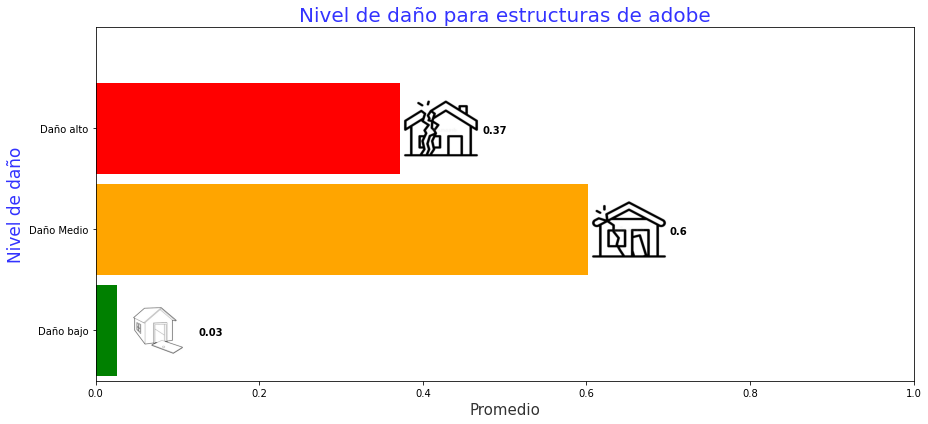

In [156]:
labels =['Daño bajo','Daño Medio','Daño alto']
colors = ['green','orange','red']
levels = ['Daño Bajo','Daño Medio','Daño Alto']
values = danio_adobe['promedio']

height = 0.9
v =plt.barh(y=labels, width=values, height=height, color=colors, align='center')
plt.title("Nivel de daño para estructuras de adobe", fontsize=20, color = 'blue',alpha = 0.8)
plt.ylabel("Nivel de daño", fontsize=17, color = 'blue', alpha = 0.8)
plt.xlabel("Promedio", fontsize=15, color = 'black', alpha = 0.8)

for i, (label, value) in enumerate(zip(labels, values)):
    rut = (f'./drive/My Drive/Colab Notebooks/TP1/imagenes/damage{i+1}.jpg')
    img = cv2.imread(rut, cv2.IMREAD_COLOR)
    plt.imshow(img, extent=[value+0.1, value, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2, filterrad=10.0)

plt.xlim(0,1)
plt.ylim(-0.5, 3)
#plt.legend(v, levels)

for i, v in enumerate(values):
    izq = (i+1)*0.1
    if v == 0.0 :
      position = v - 10
      colors = 'red'
    else : 
      position = v 
      colors = 'black'
    plt.text(v+0.1,i - 0.05, str(round(v, 2)), color=colors, fontweight='bold')

plt.gcf().set_size_inches(13, 6)
plt.tight_layout()
plt.show()

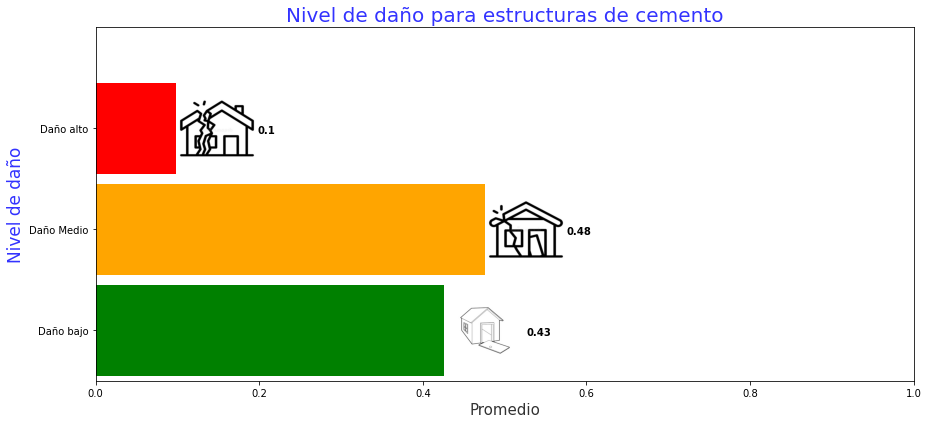

In [157]:
labels =['Daño bajo','Daño Medio','Daño alto']
colors = ['green','orange','red']
levels = ['Daño Bajo','Daño Medio','Daño Alto']
values = danio_cemento['promedio']

height = 0.9
v =plt.barh(y=labels, width=values, height=height, color=colors, align='center')
plt.title("Nivel de daño para estructuras de cemento", fontsize=20, color = 'blue',alpha = 0.8)
plt.ylabel("Nivel de daño", fontsize=17, color = 'blue', alpha = 0.8)
plt.xlabel("Promedio", fontsize=15, color = 'black', alpha = 0.8)

for i, (label, value) in enumerate(zip(labels, values)):
    rut = (f'./drive/My Drive/Colab Notebooks/TP1/imagenes/damage{i+1}.jpg')
    img = cv2.imread(rut, cv2.IMREAD_COLOR)
    plt.imshow(img, extent=[value+0.1, value, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2, filterrad=10.0)

plt.xlim(0,1)
plt.ylim(-0.5, 3)
#plt.legend(v, levels)

for i, v in enumerate(values):
    izq = (i+1)*0.1
    if v == 0.0 :
      position = v - 10
      colors = 'red'
    else : 
      position = v 
      colors = 'black'
    plt.text(v+0.1,i - 0.05, str(round(v, 2)), color=colors, fontweight='bold')

plt.gcf().set_size_inches(13, 6)
plt.tight_layout()
plt.show()


**Estructuras de Adobe**
Son la mayoria de casos de estructuras mas dañadas. Este tipo de estructuras presentan en promedio daños de nivel más graves en comparación con otras estructuras. 

**Estructuras de Cemento (Concreto o ladrillos)**
En este tipo de estrutura se minimizan los daños graves contemplando más casos de daños medios. Por otro lado algunas de ellas tienen indices de daños bajos superiores en promedio a los de estructuras de adobe.

También es conveniente analizar si con el correr del tiempo cada uno de estos tipos mejoraron o mantuvieron siempre las mismas cualidades segun la antiguedad de los edificios.

In [82]:
#MERGE
values_labels = train_values.merge(train_labels, how = 'inner' , on='building_id')
adobe = values_labels[(values_labels['has_superstructure_adobe_mud'] == 1) & (values_labels['has_superstructure_mud_mortar_brick'] == 0) & (values_labels['has_superstructure_cement_mortar_brick'] == 0)]
cemento = values_labels[(values_labels['has_superstructure_adobe_mud'] == 0) & (values_labels['has_superstructure_mud_mortar_brick'] == 1) & (values_labels['has_superstructure_cement_mortar_brick'] == 1)]
total_adobe = adobe.shape[0]
total_cemento = cemento.shape[0]

In [85]:
adobe = adobe.loc[:,['plan_configuration']]
ag = {'Cantidad' : ('plan_configuration','count'),}
plan_adobe = adobe.groupby(['plan_configuration']).agg(**ag).reset_index()
plan_adobe['total'] = total_adobe
plan_adobe['promedio'] = plan_adobe.Cantidad / plan_adobe.total
plan_adobe

,plan_configuration,Cantidad,total,promedio
0,a,4,15358,0.000260
1,c,5,15358,0.000326
2,d,14607,15358,0.951100
3,f,2,15358,0.000130
4,m,1,15358,0.000065
5,n,1,15358,0.000065
6,o,2,15358,0.000130
7,q,485,15358,0.031580
8,s,28,15358,0.001823
9,u,223,15358,0.014520


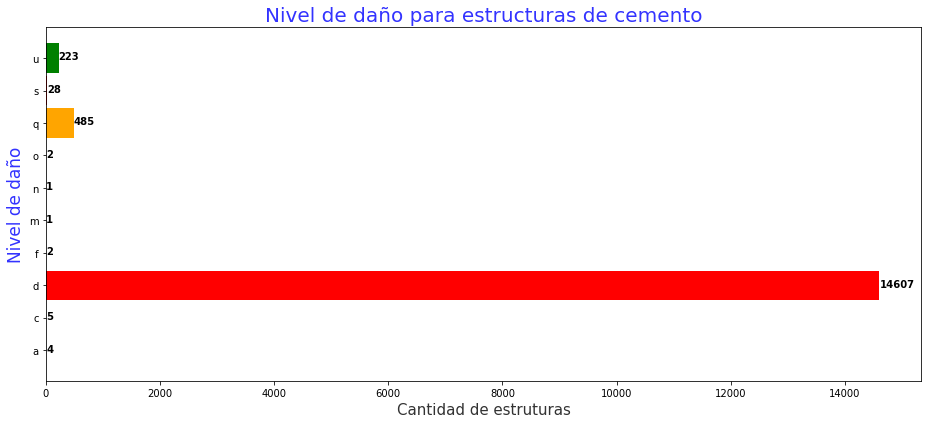

In [159]:
labels =plan_adobe['plan_configuration']
colors = ['green','orange','red']
levels = ['Daño Bajo','Daño Medio','Daño Alto']
values = plan_adobe['Cantidad']

height = 0.9
v =plt.barh(y=labels, width=values, height=height, color=colors, align='center')
plt.title("Nivel de daño para estructuras de cemento", fontsize=20, color = 'blue',alpha = 0.8)
plt.ylabel("Nivel de daño", fontsize=17, color = 'blue', alpha = 0.8)
plt.xlabel("Cantidad de estruturas", fontsize=15, color = 'black', alpha = 0.8)


#plt.xlim(0,1)
#plt.ylim(-0.5, 3)
#plt.legend(v, levels)

for i, v in enumerate(values):
    izq = (i+1)*0.1
    if v == 0.0 :
      position = v - 10
      colors = 'red'
    else : 
      position = v 
      colors = 'black'
    plt.text(v+0.1,i - 0.05, str(round(v, 2)), color=colors, fontweight='bold')

plt.gcf().set_size_inches(13, 6)
plt.tight_layout()
plt.show()

**Las estructuras antisismicas mas usadas** : u,q,d

Puedo analizar que tipos de materiales utilizan principalmente estos tipos como así también los cimientos principales.

In [216]:
#MERGE
list_t = ['u,q,d']
values_labels = train_values.merge(train_labels, how = 'inner' , on='building_id')
plan = values_labels.loc[values_labels['plan_configuration'].isin(['u','q','d'])]

#FILTRO COLUMNAS
col = list(values_labels.columns)
filtro1 = [col for col in values_labels if col.find('has_superstructure')>=0]
filtro1.append('plan_configuration')
materiales = values_labels.loc[:,filtro1]
traducciones = ['adobe_barro','barro_piedra','piedra','cemento_piedra','barro_ladrillos','cemento_ladrillos','madera','caña','concreto_reforzado','concreto_reforzado_diseñado','otros','plan']

def renombrar_columnas(df):
    i = 0
    for nombre in filtro1:
        newname = traducciones[i]
        i = i+1 
        df = df.rename(columns={nombre : newname}) #nombre[19:len(s)]
    return df

materiales = renombrar_columnas(materiales)
materiales.drop('otros', axis='columns', inplace=True)
ag = {'Cantidad_g1' : ('g1','sum'),
        'Cantidad_g2' : ('g2','sum'),
        'Cantidad_g3' : ('g3','sum'),
      }

plan = materiales.loc[materiales['plan'].isin(['u','q','d'])]
result = plan.groupby(['plan']).agg('sum').reset_index()
#result.drop(['piedra','cemento_piedra','caña','concreto_reforzado_diseñado'],axis = 'columns',inplace=True) 
result['total'] = result.iloc[:,1:7].sum(axis=1)
result['adobe_barro'] = result['adobe_barro'] * 100 / result['total'] 
result['barro_piedra'] = result['barro_piedra'] * 100 / result['total'] 
result['barro_ladrillos'] = result['barro_ladrillos'] * 100 / result['total'] 
result['cemento_ladrillos'] = result['cemento_ladrillos'] * 100 / result['total'] 
result['madera'] = result['madera'] * 100 / result['total'] 
result['concreto_reforzado'] = result['concreto_reforzado'] * 100 / result['total'] 
result['cemento_piedra'] = result['cemento_piedra'] * 100 / result['total']
result['piedra'] = result['piedra'] * 100 / result['total']
result['caña'] = result['caña'] * 100 / result['total']
result['concreto_reforzado_diseñado'] = result['concreto_reforzado_diseñado'] * 100 / result['total']

plan_d = result[(result['plan'] == 'd')]
plan_d.drop(['plan','total'],axis = 'columns',inplace=True) 
plan_d = plan_d.transpose().reset_index()
plan_d = plan_d.rename(index=str, columns={0: "Porcentaje", 'index':'Material'})

plan_q = result[(result['plan'] == 'q')]
plan_q.drop(['plan','total'],axis = 'columns',inplace=True) 
plan_q = plan_q.transpose().reset_index()
plan_q = plan_q.rename(index=str, columns={1: "Porcentaje", 'index':'Material'})

plan_u = result[(result['plan'] == 'u')]
plan_u.drop(['plan','total'],axis = 'columns',inplace=True) 
plan_u = plan_u.transpose().reset_index()
plan_u = plan_u.rename(index=str, columns={2: "Porcentaje", 'index':'Material'})

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


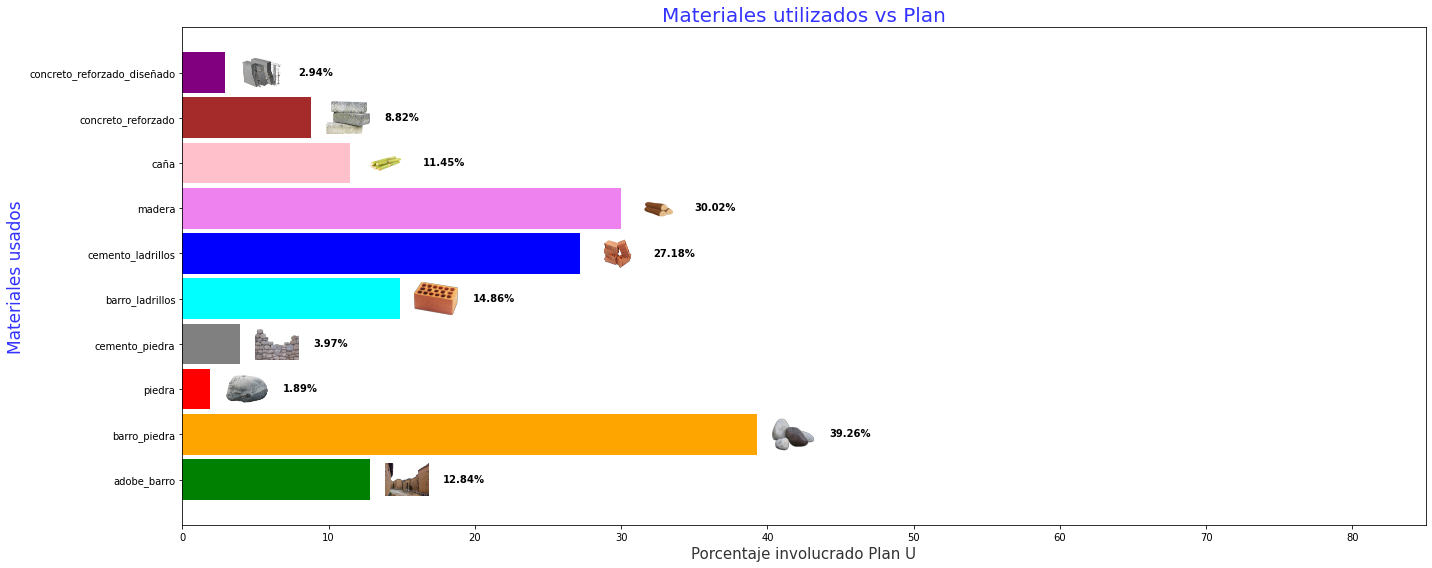

In [217]:

labels = plan_u['Material'].tolist()
colors = ['green','orange','red','grey','cyan','blue','violet','pink','Brown','purple']
levels = ['Daño Bajo','Daño Medio','Daño Alto']
values = plan_u['Porcentaje'].tolist()

height = 0.9
v =plt.barh(y=labels, width=values, height=height, color=colors, align='center')
plt.title("Materiales utilizados vs Plan", fontsize=20, color = 'blue',alpha = 0.8)
plt.ylabel("Materiales usados", fontsize=17, color = 'blue', alpha = 0.8)
plt.xlabel("Porcentaje involucrado Plan U", fontsize=15, color = 'black', alpha = 0.8)

tip = ['adobe_barro','barro_piedra','piedra','cemento_piedra','barro_ladrillos','cemento_ladrillos','madera','caña','concreto_reforzado','concreto_reforzado_diseño']
for i, (label, value) in enumerate(zip(labels, values)):
   rut = (f'./drive/My Drive/Colab Notebooks/TP1/imagenes/materiales/iconos/{tip[i]}.png')
   img = mpimg.imread(rut)
   plt.imshow(img, extent=[value + 1, value +4, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2, filterrad=10.0)


plt.xlim(0, 85)
plt.ylim(-1, 10)
#plt.legend(v, labels)

for i, v in enumerate(values):
    izq = 10 + (i+1)*1
    if v == 0.0 :
      colors = 'red'
    else : 
      colors = 'black'
    if v > 75 : position =3
    else : position = 5
    plt.text(v + position,i - .05, str(round(v, 2)) + '%', color=colors, fontweight='bold')

plt.gcf().set_size_inches(20, 8)
plt.tight_layout()
plt.show()

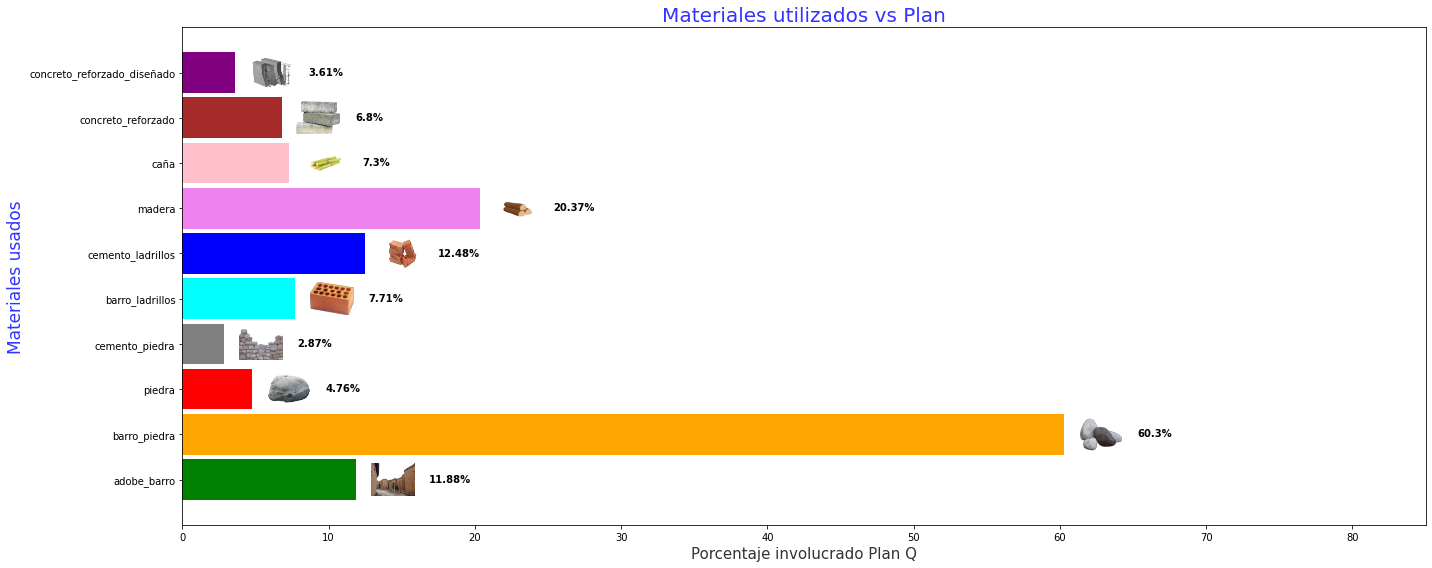

In [218]:

labels = plan_q['Material'].tolist()
colors = ['green','orange','red','grey','cyan','blue','violet','pink','Brown','purple']
levels = ['Daño Bajo','Daño Medio','Daño Alto']
values = plan_q['Porcentaje'].tolist()

height = 0.9
v =plt.barh(y=labels, width=values, height=height, color=colors, align='center')
plt.title("Materiales utilizados vs Plan", fontsize=20, color = 'blue',alpha = 0.8)
plt.ylabel("Materiales usados", fontsize=17, color = 'blue', alpha = 0.8)
plt.xlabel("Porcentaje involucrado Plan Q", fontsize=15, color = 'black', alpha = 0.8)

tip = ['adobe_barro','barro_piedra','piedra','cemento_piedra','barro_ladrillos','cemento_ladrillos','madera','caña','concreto_reforzado','concreto_reforzado_diseño']
for i, (label, value) in enumerate(zip(labels, values)):
   rut = (f'./drive/My Drive/Colab Notebooks/TP1/imagenes/materiales/iconos/{tip[i]}.png')
   img = mpimg.imread(rut)
   plt.imshow(img, extent=[value + 1, value +4, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2, filterrad=10.0)


plt.xlim(0, 85)
plt.ylim(-1, 10)
#plt.legend(v, labels)

for i, v in enumerate(values):
    izq = 10 + (i+1)*1
    if v == 0.0 :
      colors = 'red'
    else : 
      colors = 'black'
    if v > 75 : position =3
    else : position = 5
    plt.text(v + position,i - .05, str(round(v, 2)) + '%', color=colors, fontweight='bold')

plt.gcf().set_size_inches(20, 8)
plt.tight_layout()
plt.show()

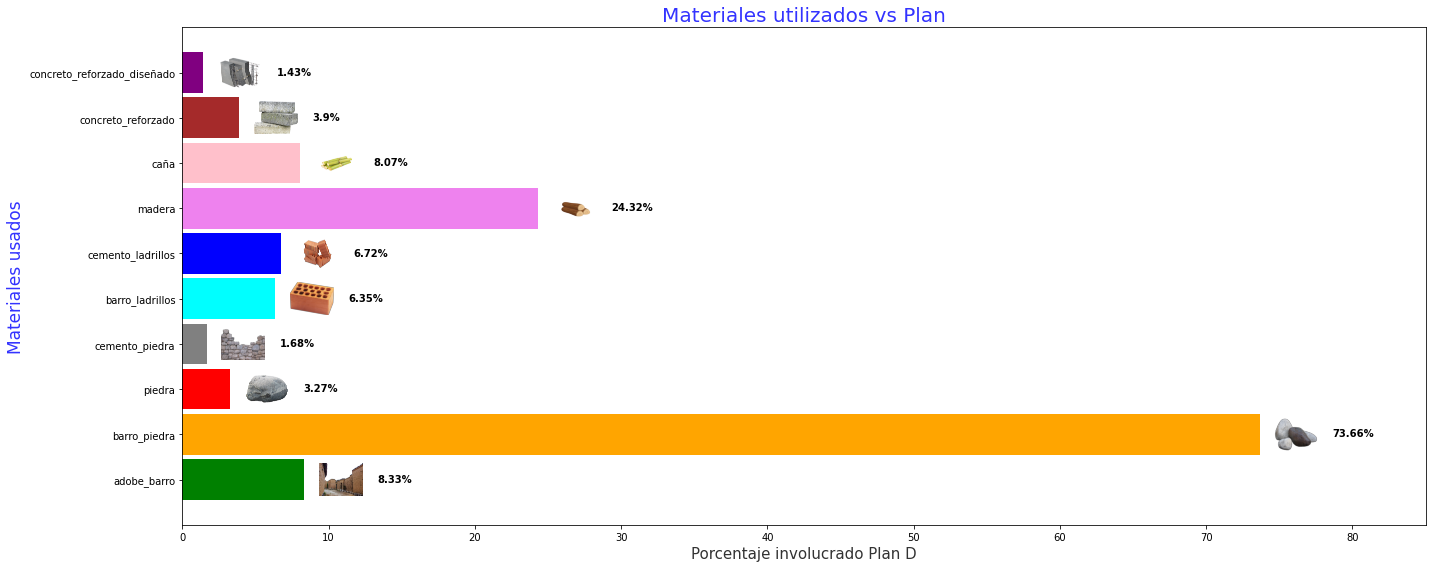

In [219]:
labels = plan_d['Material'].tolist()
colors = ['green','orange','red','grey','cyan','blue','violet','pink','Brown','purple']
levels = ['Daño Bajo','Daño Medio','Daño Alto']
values = plan_d['Porcentaje'].tolist()

height = 0.9
v =plt.barh(y=labels, width=values, height=height, color=colors, align='center')
plt.title("Materiales utilizados vs Plan", fontsize=20, color = 'blue',alpha = 0.8)
plt.ylabel("Materiales usados", fontsize=17, color = 'blue', alpha = 0.8)
plt.xlabel("Porcentaje involucrado Plan D", fontsize=15, color = 'black', alpha = 0.8)

tip = ['adobe_barro','barro_piedra','piedra','cemento_piedra','barro_ladrillos','cemento_ladrillos','madera','caña','concreto_reforzado','concreto_reforzado_diseño']
for i, (label, value) in enumerate(zip(labels, values)):
   rut = (f'./drive/My Drive/Colab Notebooks/TP1/imagenes/materiales/iconos/{tip[i]}.png')
   img = mpimg.imread(rut)
   plt.imshow(img, extent=[value + 1, value +4, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2, filterrad=10.0)


plt.xlim(0, 85)
plt.ylim(-1, 10)
#plt.legend(v, labels)

for i, v in enumerate(values):
    izq = 10 + (i+1)*1
    if v == 0.0 :
      colors = 'red'
    else : 
      colors = 'black'
    if v > 75 : position =3
    else : position = 5
    plt.text(v + position,i - .05, str(round(v, 2)) + '%', color=colors, fontweight='bold')

plt.gcf().set_size_inches(20, 8)
plt.tight_layout()
plt.show()

**En los planes mas utilizados (u,q,d)**

Los porcentajes de materiales utilizados son similares entre D y Q.

Porporcion de concreto iguales en Planes Q y U.

El material más utilizado en todos los casos es al igual que en terminosgenerales el barro con piedra. 

**PLAN D:**

Mas utilizado: barro con piedra.

Menos utilizado:  cemento_piedra.

Del grupo es el que  menos concreto utiliza.

**PLAN Q**

Más utilizado:  barro con piedra .

Menos utilizado: cemento_piedra.

**Plan U**

Más utilizado: Madera y barro con piedra.

Menos utilizado: Piedra.

Del grupo es el que  mas utiliza madera y ladrillos.

**Nivel de precariedad** 

Considerando elementos previamente analizados como concreto vs adobe:
**PLan U > PLan Q > Plan D**

# SELECCION DE DATOS

In [220]:
data = train_values.loc[:,['count_floors_pre_eq']]
max_cant_pisos = data.max().iloc[0]
min_cant_pisos = data.min().iloc[0]
print("MAXIMA CANTIDAD DE PISOS:" + str(max_cant_pisos))
print("MINIMA CANTIDAD DE PISOS:" + str(min_cant_pisos))

MAXIMA CANTIDAD DE PISOS:9
MINIMA CANTIDAD DE PISOS:1


In [221]:
ag = {'Cantidad' : ('building_id','count'),}
group_pisos = train_values.groupby(['count_floors_pre_eq']).agg(**ag).reset_index()
group_pisos.head(9)

,count_floors_pre_eq,Cantidad
0,1,40441
1,2,156623
2,3,55617
3,4,5424
4,5,2246
5,6,209
6,7,39
7,8,1
8,9,1
